<a href="https://colab.research.google.com/github/OConnorsphysics/Uleth_Data_Science/blob/main/Modelling_LogisticReg_Cancer_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1bZKsW45WU9qy7y13X5QF5IYgJ58OTYm0'>

***

## <font color='darkorange'>Logistic regression</font>

> In previous classes we have used exploratory approaches to visualize and quantify relationships between variables. We used linear regression to make predictions about numeric values (e.g., boston house prices), now we will use logistic regression models for a classification problem. Here we will try and distinguish tissue samples as positive/negative for breast cancer.

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Then let's load in the breast cancer dataset, and get it into a format we can use.

In [ ]:
# The tissue sample dataset
df_cancer = pd.read_csv('/content/cancer.csv')

#take a look
df_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,benign,technician
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,3
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,3
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,3
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,4
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,3
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,3


### <font color='darkorange'>Understand the data </font>

In [ ]:
df_cancer.dtypes

mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave_points        float64
mean_symmetry              float64
mean_fractal_dimension     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity            float64
worst_concave_points       float64
worst_symmetry      

Check for missing values


In [ ]:
df_cancer.isnull().count()

mean_radius                569
mean_texture               569
mean_perimeter             569
mean_area                  569
mean_smoothness            569
mean_compactness           569
mean_concavity             569
mean_concave_points        569
mean_symmetry              569
mean_fractal_dimension     569
radius_error               569
texture_error              569
perimeter_error            569
area_error                 569
smoothness_error           569
compactness_error          569
concavity_error            569
concave_points_error       569
symmetry_error             569
fractal_dimension_error    569
worst_radius               569
worst_texture              569
worst_perimeter            569
worst_area                 569
worst_smoothness           569
worst_compactness          569
worst_concavity            569
worst_concave_points       569
worst_symmetry             569
worst_fractal_dimension    569
benign                     569
technician                 569
dtype: i

In [ ]:
df_cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,benign,technician
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417,2.456942
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918,1.098330
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000,1.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000,1.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000,2.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000,3.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000,4.000000


### <font color='darkorange'>Visualize and Explore </font>

Histogram of the target variable

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

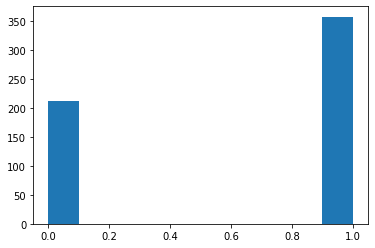

In [ ]:
plt.hist(data=df_cancer,x='benign')

Plot the target variable (benign) on the y-axis with another variable on the x-axis. 

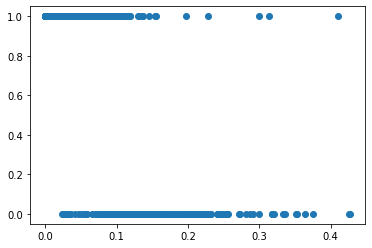

In [ ]:
plt.scatter(data=df_cancer, x='mean_concavity', y='benign')

Create a heat map to help explore correlations


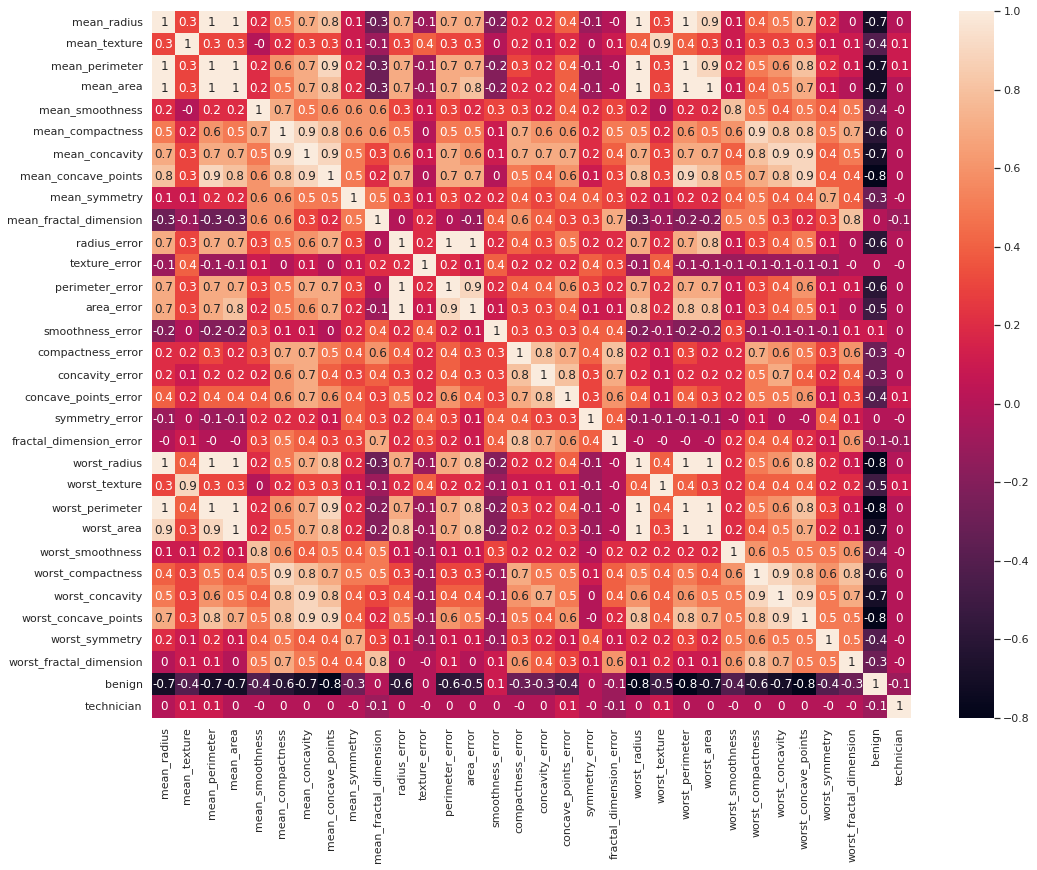

In [ ]:

sns.set(rc={'figure.figsize':(17,13)})
sns.heatmap(df_cancer.corr().round(1), annot = True)

### <font color='darkorange'>Data wrangling </font>

**Data preprocessing (binary variables)**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#get the columns names of features you'd like to turn into 0/1
bin_names = ['benign']

#create a dataframe of those features
bin_features = df_cancer[bin_names]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df_cancer[bin_names] = bin_features

#take a look
df_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,benign,technician
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0,3
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0,3
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,3
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,4
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,3
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,3


In [ ]:
bin_scaler.categories_

[array([0, 1])]

**Data preprocessing (categorical variables)**

Technician ID number is a categorical value, but it is being treated as a number (int64). Convert it to a category.

In [ ]:
df_cancer['technician'] = df_cancer.technician.astype('category')

In [ ]:

#categorical variables
cat_names = ['technician']

#create dummy variables
df_cat = pd.get_dummies(df_cancer[cat_names])

#add them back to the original dataframe
df_cancer = pd.concat([df_cancer,df_cat], axis=1)

#remove the old columns
df_cancer = df_cancer.drop(cat_names, axis=1)

#take a look
df_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,benign,technician_1,technician_2,technician_3,technician_4
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.66560,0.7119,0.2654,0.4601,0.11890,0.0,0,1,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.18660,0.2416,0.1860,0.2750,0.08902,0.0,0,0,1,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.42450,0.4504,0.2430,0.3613,0.08758,0.0,0,0,1,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.86630,0.6869,0.2575,0.6638,0.17300,0.0,1,0,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.20500,0.4000,0.1625,0.2364,0.07678,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,0,0,1,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,0,0,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,0,0,1,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,0,0,1,0


**Split our dataframe into training and testing datasets**

In [ ]:
#split the data into training and testing (80/20 split)
df_train, df_test = sk.model_selection.train_test_split(df_cancer, test_size=0.20)


In [ ]:
#take a look training dataset
df_train.shape

(455, 35)

In [ ]:
#take a look
df_test.shape


(114, 35)

**Data pre-processing (numeric)**

In [ ]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

#numeric variables
numb_names = df_train.drop(['benign','technician_1','technician_2','technician_3','technician_4'],axis=1).select_dtypes('number').columns.tolist()

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_train[numb_names] = sc.fit_transform(df_train[numb_names])

#use the fit from the training data to transform the test data
df_test[numb_names] = sc.fit_transform(df_test[numb_names])



### <font color='darkorange'>Modeling and Prediction</font>

**Fit a model**

First model version to predict if the tissue sample is benign or not.

In [ ]:
#define model parameters
log_reg = smf.logit('benign ~ worst_radius + mean_concave_points + worst_perimeter', data=df_train)

#fit the model to the training data
results = log_reg.fit()

#Get a summary of the model parameters
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.131293
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 benign   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.7995
Time:                        22:04:52   Log-Likelihood:                -59.738
converged:                       True   LL-Null:                       -297.99
Covariance Type:            nonrobust   LLR p-value:                5.902e-103
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4979      0.240      2.073      0.038       0.027       0.969
wo

**Visualize and explore the model predictions**

Look at where the model to a good/bad job of classifying images into benign or not!

In [ ]:
#let's first predict values in the testing dataset
df_test['benign_prob'] = results.predict(df_test).round(2)

df_test['benign_pred'] = (df_test['benign_prob']>0.5).astype(int) #here we've used 0.5 as the threshold of benign or not!

df_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_concave_points,worst_symmetry,worst_fractal_dimension,benign,technician_1,technician_2,technician_3,technician_4,benign_prob,benign_pred
436,-0.381692,0.029417,-0.413068,-0.434565,-0.408547,-0.553253,-0.927960,-0.755190,0.087036,-0.005852,...,-0.801976,0.533490,-0.461976,1.0,0,0,1,0,0.99,1
217,-1.118856,-0.445374,-1.114126,-0.941908,-1.105013,-0.887316,-0.449755,-0.996649,0.445248,-0.048298,...,-1.189764,-0.106486,-0.429875,1.0,0,0,1,0,1.00,1
461,3.635441,1.580553,3.733991,4.940571,0.688290,1.474959,3.226787,2.751778,0.782593,-0.966174,...,1.936660,-0.432946,-0.595587,0.0,0,0,0,1,0.00,0
247,-0.376170,-1.222095,-0.322353,-0.426469,-0.650572,0.389594,0.508099,-0.307340,-0.834577,0.076385,...,0.469878,-0.435822,1.292753,1.0,1,0,0,0,0.89,1
89,0.106990,-0.961651,0.108149,-0.049470,0.997258,0.377760,0.054303,0.423436,0.973871,-0.007179,...,0.243795,0.300510,-0.141830,1.0,0,0,1,0,0.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,-0.552869,0.697811,-0.591715,-0.549797,-1.016185,-1.006841,-0.937940,-0.951627,-1.015422,-0.497951,...,-0.808731,0.227165,-0.258957,1.0,0,0,0,1,0.99,1
105,-0.315430,-0.887898,-0.232433,-0.377894,2.709457,1.097955,1.346191,1.024596,0.309614,1.778170,...,1.055763,0.294758,2.277483,0.0,1,0,0,0,0.17,0
104,-1.038790,-0.028204,-1.020227,-0.901698,0.140515,-0.435756,-0.783909,-0.965845,1.325127,0.171887,...,-1.240495,-0.166888,-0.541362,1.0,0,1,0,0,1.00,1
39,-0.213276,0.324432,-0.185086,-0.299633,0.250585,0.235750,0.134144,0.038380,-0.403332,0.089649,...,1.430730,-0.194213,0.828585,0.0,0,0,0,1,0.69,1


Plot the predicted and observed points!

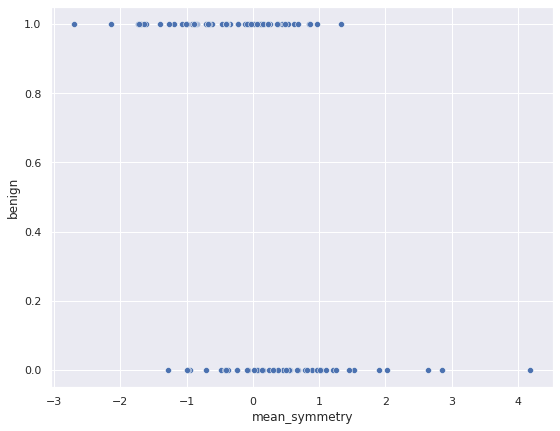

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.scatterplot(data=df_test,x='mean_symmetry', y='benign')

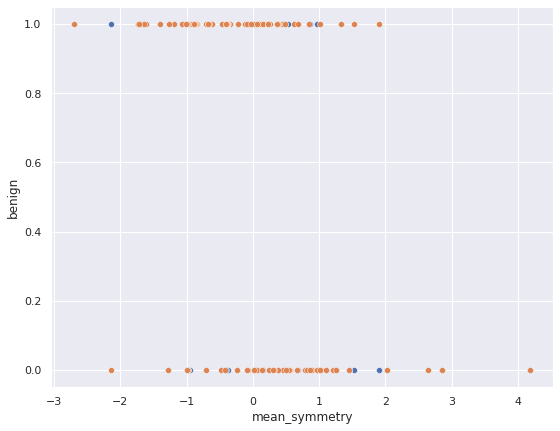

In [ ]:
sns.scatterplot(data=df_test,x='mean_symmetry', y='benign')
sns.scatterplot(data=df_test,x='mean_symmetry', y='benign_pred')

How good is the model at classifying?

In [ ]:
#confusion table
confusion_matrix = sk.metrics.confusion_matrix(df_test['benign'], df_test['benign_pred'])
print(confusion_matrix)

[[38  9]
 [ 4 63]]


Text(57.5, 0.5, 'True label')

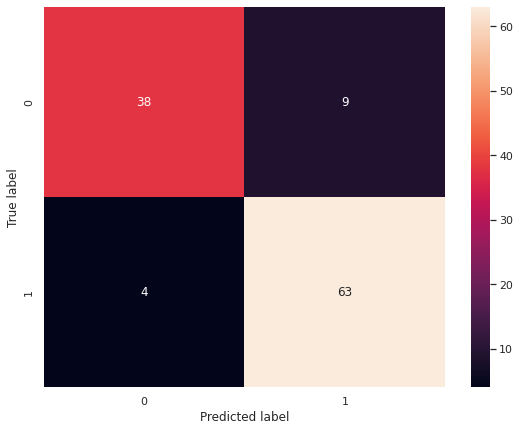

In [ ]:
#more visual approach
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Measuring classification success:

In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(df_test['benign'], df_test['benign_pred'])))
print('precision: {:.2f}'.format(sk.metrics.precision_score(df_test['benign'], df_test['benign_pred'])))
print('recal: {:.2f}'.format(sk.metrics.recall_score(df_test['benign'], df_test['benign_pred'])))


Accuracy: 0.89
precision: 0.88
recal: 0.94


> **Accuracy** is the overall ability of the model to correctly identify positive and negative samples.

> **Precision** is intuitively the ability of the classifier to not label a sample as positive if it is negative.

> **Recall** is intuitively the ability of the classifier to find all the positive samples.

Compare that accuracy if we just predicted the most common type (i.e., let's compute a baseline!)

In [ ]:
df_cancer.benign.value_counts()

1.0    357
0.0    212
Name: benign, dtype: int64

In [ ]:
357/(212+357)

0.6274165202108963

**Fit a more complex model**

Improved model using many predictors with correlation > 0.5 (absolute)

In [ ]:
#define model parameters
log_reg2 = smf.logit('benign ~ worst_radius + mean_concave_points + worst_perimeter + mean_radius + mean_perimeter + mean_area + mean_compactness + mean_concave_points + worst_compactness + worst_area' , data=df_train)

#fit the model to the training data
results2 = log_reg2.fit(method='bfgs')

#Get a summary of the model parameters
print(results2.summary())


         Current function value: 0.084669
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                 benign   No. Observations:                  455
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                            9
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.8707
Time:                        22:52:01   Log-Likelihood:                -38.524
converged:                      False   LL-Null:                       -297.99
Covariance Type:            nonrobust   LLR p-value:                5.075e-106
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2579      0.903     -0.286      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Visualize and explore these predictions

In [ ]:
#let's first predict values in the testing dataset
df_test['benign_prob_multi'] = results2.predict(df_test).round(2)

df_test['benign_pred_multi'] = (df_test['benign_prob_multi']>0.5).astype(int) #here we've used 0.5 as the threshold of benign or not!

df_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_fractal_dimension,benign,technician_1,technician_2,technician_3,technician_4,benign_prob,benign_pred,benign_prob_multi,benign_pred_multi
436,-0.381692,0.029417,-0.413068,-0.434565,-0.408547,-0.553253,-0.927960,-0.755190,0.087036,-0.005852,...,-0.461976,1.0,0,0,1,0,0.99,1,1.00,1
217,-1.118856,-0.445374,-1.114126,-0.941908,-1.105013,-0.887316,-0.449755,-0.996649,0.445248,-0.048298,...,-0.429875,1.0,0,0,1,0,1.00,1,1.00,1
461,3.635441,1.580553,3.733991,4.940571,0.688290,1.474959,3.226787,2.751778,0.782593,-0.966174,...,-0.595587,0.0,0,0,0,1,0.00,0,0.00,0
247,-0.376170,-1.222095,-0.322353,-0.426469,-0.650572,0.389594,0.508099,-0.307340,-0.834577,0.076385,...,1.292753,1.0,1,0,0,0,0.89,1,0.84,1
89,0.106990,-0.961651,0.108149,-0.049470,0.997258,0.377760,0.054303,0.423436,0.973871,-0.007179,...,-0.141830,1.0,0,0,1,0,0.38,0,0.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,-0.552869,0.697811,-0.591715,-0.549797,-1.016185,-1.006841,-0.937940,-0.951627,-1.015422,-0.497951,...,-0.258957,1.0,0,0,0,1,0.99,1,0.99,1
105,-0.315430,-0.887898,-0.232433,-0.377894,2.709457,1.097955,1.346191,1.024596,0.309614,1.778170,...,2.277483,0.0,1,0,0,0,0.17,0,0.00,0
104,-1.038790,-0.028204,-1.020227,-0.901698,0.140515,-0.435756,-0.783909,-0.965845,1.325127,0.171887,...,-0.541362,1.0,0,1,0,0,1.00,1,1.00,1
39,-0.213276,0.324432,-0.185086,-0.299633,0.250585,0.235750,0.134144,0.038380,-0.403332,0.089649,...,0.828585,0.0,0,0,0,1,0.69,1,0.42,0


How good is the model at predicting?

In [ ]:
#confusion table
confusion_matrix2 = sk.metrics.confusion_matrix(df_test['benign'], df_test['benign_pred_multi'])
print(confusion_matrix2)

[[43  4]
 [ 2 65]]


Text(57.5, 0.5, 'True label')

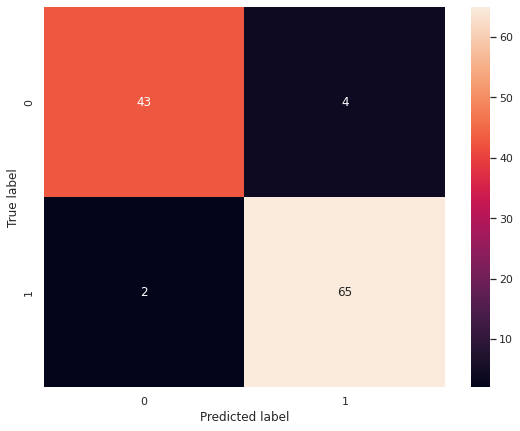

In [ ]:
#more visual approach
sns.heatmap(confusion_matrix2, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

Measuring classification success:

In [ ]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(df_test['benign'], df_test['benign_pred_multi'])))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(df_test['benign'], df_test['benign_pred_multi'])))
print('Recall: {:.2f}'.format(sk.metrics.recall_score(df_test['benign'], df_test['benign_pred_multi'])))

Accuracy: 0.95
Precision: 0.94
Recall: 0.97


> **Accuracy** is the fraction of predictions our model got right.

> **Precision** is intuitively the ability of the classifier to not label a sample as positive if it is negative.

> **Recall** is intuitively the ability of the classifier to find all the positive samples.

**bold text**### <font color='darkorange'>Attempting a similar model on the Classic Titanic Dataset.</font>


**Titanic survivors**

In [ ]:
df_titanic = pd.read_csv('titanic_subset.csv')

df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1134,NaN,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.5000,...,C,269.0,"Spedden, Mr. Frederic Oakley",45.0,"Tuxedo Park, New York, US",Cherbourg,"Tuxedo Park, New York, US",3,NaN,1.0
1,962,NaN,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,...,Q,1048.0,"Mulvihill, Miss Bridget Elizabeth ""Bertha""",25.0,"Athlone, Westmeath, Ireland",Queenstown,"Providence, Rhode Island, US",15,NaN,3.0
2,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,...,S,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0
3,769,0.0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,...,Q,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0
4,1050,NaN,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,...,S,37.0,"Borebank, Mr. John James",42.0,"London, England, UK",Southampton,"Toronto, Ontario, Canada",NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,...,C,122.0,"Frauenthal, Mr. Isaac Gerald",43.0,"London, England, UK",Southampton,"New York, New York, US",5,NaN,1.0
1043,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,...,C,328.0,"Abelson, Mrs. Anna (née Wizosky?)",28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0
1044,103,0.0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,...,S,309.0,"White, Mr. Richard Frasar",21.0,"Brunswick, Maine, US",Southampton,"Brunswick, Maine, US",NaN,169MB,1.0
1045,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,...,C,297.0,"Thayer, Mrs. Marian Longsteth (née Morris)",39.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",4,NaN,1.0


**Data understanding**

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1047 non-null   int64  
 1   Survived     710 non-null    float64
 2   Pclass       1047 non-null   int64  
 3   Name         1047 non-null   object 
 4   Sex          1047 non-null   object 
 5   Age          843 non-null    float64
 6   SibSp        1047 non-null   int64  
 7   Parch        1047 non-null   int64  
 8   Ticket       1047 non-null   object 
 9   Fare         1046 non-null   float64
 10  Cabin        239 non-null    object 
 11  Embarked     1046 non-null   object 
 12  WikiId       1044 non-null   float64
 13  Name_wiki    1044 non-null   object 
 14  Age_wiki     1042 non-null   float64
 15  Hometown     1044 non-null   object 
 16  Boarded      1044 non-null   object 
 17  Destination  1044 non-null   object 
 18  Lifeboat     401 non-null    object 
 19  Body  

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived       337
Pclass           0
Name             0
Sex              0
Age            204
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          808
Embarked         1
WikiId           3
Name_wiki        3
Age_wiki         5
Hometown         3
Boarded          3
Destination      3
Lifeboat       646
Body           937
Class            3
dtype: int64

In [ ]:
df_titanic.dropna(how='any', axis=0, subset=['Survived'], inplace=True)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
2,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,...,S,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0
3,769,0.0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,...,Q,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0
5,118,0.0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,...,S,580.0,"Turpin, Mr. William John Robert",29.0,"Plymouth, Devon, England",Southampton,"Salt Lake City, Utah, US",NaN,NaN,2.0
7,662,0.0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,...,C,666.0,"Badt, Mr. Mohamed",40.0,"Tripoli, Lebanon",Cherbourg,New York City,NaN,NaN,3.0
8,413,1.0,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,...,Q,207.0,"Minahan, Miss Daisy E.",33.0,"Fond du Lac, Wisconsin, US",Southampton,"Fond du Lac, Wisconsin, US",14,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,...,C,51.0,"and maid, Miss Annie Moore Ward",38.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0
1043,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,...,C,328.0,"Abelson, Mrs. Anna (née Wizosky?)",28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0
1044,103,0.0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,...,S,309.0,"White, Mr. Richard Frasar",21.0,"Brunswick, Maine, US",Southampton,"Brunswick, Maine, US",NaN,169MB,1.0
1045,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,...,C,297.0,"Thayer, Mrs. Marian Longsteth (née Morris)",39.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",4,NaN,1.0


In [ ]:
df_titanic.drop(['Name', 'Name_wiki', 'WikiId'], axis=1, inplace=True)
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_wiki,Boarded,Destination,Lifeboat,Class
2,1.0,3,female,4.0,0,2,22.0250,NaN,S,4.0,Southampton,"Milwaukee, Wisconsin, US",2,3.0
3,0.0,3,male,NaN,1,0,24.1500,NaN,Q,27.0,Queenstown,"Brooklyn, New York, US",NaN,3.0
5,0.0,2,male,29.0,1,0,21.0000,NaN,S,29.0,Southampton,"Salt Lake City, Utah, US",NaN,2.0
7,0.0,3,male,40.0,0,0,7.2250,NaN,C,40.0,Cherbourg,New York City,NaN,3.0
8,1.0,1,female,33.0,1,0,90.0000,C78,Q,33.0,Southampton,"Fond du Lac, Wisconsin, US",14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1.0,1,female,35.0,0,0,512.3292,NaN,C,38.0,Cherbourg,"Germantown, Pennsylvania, US",3,1.0
1043,1.0,2,female,28.0,1,0,24.0000,NaN,C,28.0,Cherbourg,"New York, New York, US",10,2.0
1044,0.0,1,male,21.0,0,1,77.2875,D26,S,21.0,Southampton,"Brunswick, Maine, US",NaN,1.0
1045,1.0,1,female,39.0,1,1,110.8833,C68,C,39.0,Cherbourg,"Haverford, Pennsylvania, US",4,1.0


In [ ]:
df_titanic.reset_index()
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
2,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,...,S,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0
3,769,0.0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,...,Q,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0
5,118,0.0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,...,S,580.0,"Turpin, Mr. William John Robert",29.0,"Plymouth, Devon, England",Southampton,"Salt Lake City, Utah, US",NaN,NaN,2.0
7,662,0.0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,...,C,666.0,"Badt, Mr. Mohamed",40.0,"Tripoli, Lebanon",Cherbourg,New York City,NaN,NaN,3.0
8,413,1.0,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,...,Q,207.0,"Minahan, Miss Daisy E.",33.0,"Fond du Lac, Wisconsin, US",Southampton,"Fond du Lac, Wisconsin, US",14,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,...,C,51.0,"and maid, Miss Annie Moore Ward",38.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0
1043,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,...,C,328.0,"Abelson, Mrs. Anna (née Wizosky?)",28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0
1044,103,0.0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,...,S,309.0,"White, Mr. Richard Frasar",21.0,"Brunswick, Maine, US",Southampton,"Brunswick, Maine, US",NaN,169MB,1.0
1045,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,...,C,297.0,"Thayer, Mrs. Marian Longsteth (née Morris)",39.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",4,NaN,1.0


**Exploration and visualization**

(array([432.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 278.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

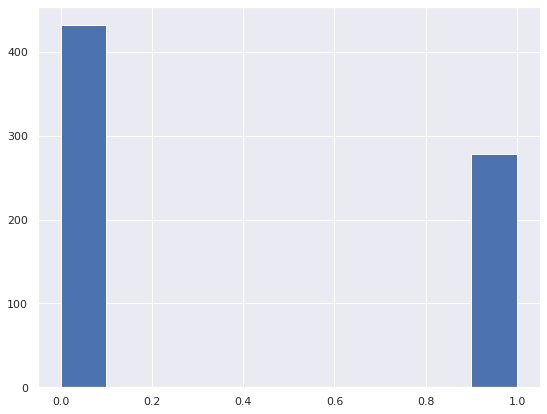

In [ ]:
plt.hist(data=df_titanic, x='Survived')


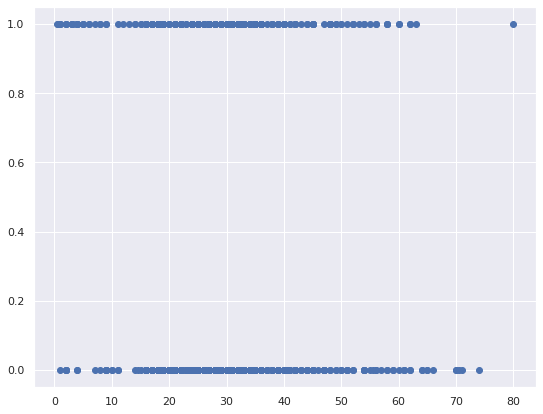

In [ ]:
plt.scatter(data=df_titanic, x='Age', y='Survived')

**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
bin_names = ['Sex']
bin_features = df_titanic[bin_names]
bin_scaler = OrdinalEncoder().fit(bin_features)
bin_features = bin_scaler.transform(bin_features)
df_titanic[bin_names] = bin_features
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
2,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",0.0,4.0,0,2,315153,22.0250,...,S,940.0,"Kink, Miss Luise Gretchen",4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0
3,769,0.0,3,"Moran, Mr. Daniel J",1.0,NaN,1,0,371110,24.1500,...,Q,1038.0,"Moran, Mr. Daniel James",27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0
5,118,0.0,2,"Turpin, Mr. William John Robert",1.0,29.0,1,0,11668,21.0000,...,S,580.0,"Turpin, Mr. William John Robert",29.0,"Plymouth, Devon, England",Southampton,"Salt Lake City, Utah, US",NaN,NaN,2.0
7,662,0.0,3,"Badt, Mr. Mohamed",1.0,40.0,0,0,2623,7.2250,...,C,666.0,"Badt, Mr. Mohamed",40.0,"Tripoli, Lebanon",Cherbourg,New York City,NaN,NaN,3.0
8,413,1.0,1,"Minahan, Miss. Daisy E",0.0,33.0,1,0,19928,90.0000,...,Q,207.0,"Minahan, Miss Daisy E.",33.0,"Fond du Lac, Wisconsin, US",Southampton,"Fond du Lac, Wisconsin, US",14,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,259,1.0,1,"Ward, Miss. Anna",0.0,35.0,0,0,PC 17755,512.3292,...,C,51.0,"and maid, Miss Annie Moore Ward",38.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0
1043,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",0.0,28.0,1,0,P/PP 3381,24.0000,...,C,328.0,"Abelson, Mrs. Anna (née Wizosky?)",28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0
1044,103,0.0,1,"White, Mr. Richard Frasar",1.0,21.0,0,1,35281,77.2875,...,S,309.0,"White, Mr. Richard Frasar",21.0,"Brunswick, Maine, US",Southampton,"Brunswick, Maine, US",NaN,169MB,1.0
1045,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",0.0,39.0,1,1,17421,110.8833,...,C,297.0,"Thayer, Mrs. Marian Longsteth (née Morris)",39.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",4,NaN,1.0


In [ ]:
bin_scaler.categories_

[array(['female', 'male'], dtype=object)]

male = 1 in One hot encoding

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 2 to 1046
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     710 non-null    float64
 1   Pclass       710 non-null    int64  
 2   Sex          710 non-null    float64
 3   Age          570 non-null    float64
 4   SibSp        710 non-null    int64  
 5   Parch        710 non-null    int64  
 6   Fare         710 non-null    float64
 7   Cabin        162 non-null    object 
 8   Embarked     709 non-null    object 
 9   Age_wiki     707 non-null    float64
 10  Boarded      709 non-null    object 
 11  Destination  709 non-null    object 
 12  Lifeboat     281 non-null    object 
 13  Class        709 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 99.4+ KB


In [ ]:
df_titanic['Pclass'] = df_titanic.Pclass.astype('category')
#categorical variables
cat_names = ['Pclass']

#create dummy variables
df_cat = pd.get_dummies(df_titanic[cat_names])

#add them back to the original dataframe
df_titanic = pd.concat([df_titanic,df_cat], axis=1)

#remove the old columns
df_titanic = df_titanic.drop(cat_names, axis=1)

#take a look
df_titanic

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Pclass_1,Pclass_2,Pclass_3
2,185,1.0,"Kink-Heilmann, Miss. Luise Gretchen",0.0,4.0,0,2,315153,22.0250,NaN,...,4.0,"Zürich, Switzerland",Southampton,"Milwaukee, Wisconsin, US",2,NaN,3.0,0,0,1
3,769,0.0,"Moran, Mr. Daniel J",1.0,NaN,1,0,371110,24.1500,NaN,...,27.0,"Askeaton, Limerick, Ireland",Queenstown,"Brooklyn, New York, US",NaN,NaN,3.0,0,0,1
5,118,0.0,"Turpin, Mr. William John Robert",1.0,29.0,1,0,11668,21.0000,NaN,...,29.0,"Plymouth, Devon, England",Southampton,"Salt Lake City, Utah, US",NaN,NaN,2.0,0,1,0
7,662,0.0,"Badt, Mr. Mohamed",1.0,40.0,0,0,2623,7.2250,NaN,...,40.0,"Tripoli, Lebanon",Cherbourg,New York City,NaN,NaN,3.0,0,0,1
8,413,1.0,"Minahan, Miss. Daisy E",0.0,33.0,1,0,19928,90.0000,C78,...,33.0,"Fond du Lac, Wisconsin, US",Southampton,"Fond du Lac, Wisconsin, US",14,NaN,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,259,1.0,"Ward, Miss. Anna",0.0,35.0,0,0,PC 17755,512.3292,NaN,...,38.0,"Germantown, Pennsylvania, US",Cherbourg,"Germantown, Pennsylvania, US",3,NaN,1.0,1,0,0
1043,875,1.0,"Abelson, Mrs. Samuel (Hannah Wizosky)",0.0,28.0,1,0,P/PP 3381,24.0000,NaN,...,28.0,Russia,Cherbourg,"New York, New York, US",10,NaN,2.0,0,1,0
1044,103,0.0,"White, Mr. Richard Frasar",1.0,21.0,0,1,35281,77.2875,D26,...,21.0,"Brunswick, Maine, US",Southampton,"Brunswick, Maine, US",NaN,169MB,1.0,1,0,0
1045,582,1.0,"Thayer, Mrs. John Borland (Marian Longstreth M...",0.0,39.0,1,1,17421,110.8833,C68,...,39.0,"Haverford, Pennsylvania, US",Cherbourg,"Haverford, Pennsylvania, US",4,NaN,1.0,1,0,0


**Model building**

In [ ]:
df_train, df_test = sk.model_selection.train_test_split(df_titanic, test_size=0.20)

In [ ]:
df_train.shape

(568, 16)

In [ ]:
df_test.shape

(142, 16)

In [ ]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

#numeric variables
numb_names = ['Age', 'Fare']

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_train[numb_names] = sc.fit_transform(df_train[numb_names])

#use the fit from the training data to transform the test data
df_test[numb_names] = sc.fit_transform(df_test[numb_names])

In [ ]:
df_test

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Pclass_1,Pclass_2,Pclass_3
276,607,0.0,"Karaic, Mr. Milan",1.0,0.158646,0,0,349246,-0.432184,NaN,...,30.0,"Vagovina, Croatia",Southampton,"Youngstown, Ohio, US",NaN,NaN,3.0,0,0,1
219,338,1.0,"Burns, Miss. Elizabeth Margaret",0.0,0.974023,0,0,16966,1.829059,E40,...,41.0,"Tuxedo Park, New York, US",Cherbourg,"Tuxedo Park, New York, US",3,NaN,1.0,1,0,0
119,560,1.0,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",0.0,0.603397,1,0,345572,-0.262432,NaN,...,36.0,"Tampico, Montana, US",Southampton,"Tampico, Montana, US",13,NaN,3.0,0,0,1
531,577,1.0,"Garside, Miss. Ethel",0.0,0.455147,0,0,243880,-0.341019,NaN,...,34.0,"Liverpool, Merseyside, England",Southampton,"Brooklyn, New York, US",12,NaN,2.0,0,1,0
294,252,0.0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",0.0,0.084521,1,1,347054,-0.386340,G6,...,29.0,"Indiana Harbor, Indiana, US",Southampton,"Indiana Harbor, Indiana, US",NaN,NaN,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,524,1.0,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",0.0,1.196399,0,1,111361,0.462342,B18,...,44.0,"Chicago, Illinois, US",Cherbourg,"Chicago, Illinois, US",4,NaN,1.0,1,0,0
570,563,0.0,"Norman, Mr. Robert Douglas",1.0,0.010396,0,0,218629,-0.332088,NaN,...,28.0,"Glasgow, Scotland",Southampton,"Houghton, Michigan, US",NaN,287MB,2.0,0,1,0
37,233,0.0,"Sjostedt, Mr. Ernst Adolf",1.0,2.308276,0,0,237442,-0.332088,NaN,...,30.0,"Hjo, Västergötland, Sweden",Southampton,"Sault Ste Marie, Michigan, US",10,NaN,2.0,0,1,0
1031,374,0.0,"Ringhini, Mr. Sante",1.0,-0.434355,0,0,PC 17760,1.849301,NaN,...,22.0,"New York, New York, US",Cherbourg,"New York, New York, US",NaN,232MB,1.0,1,0,0


In [ ]:
df_train

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Pclass_1,Pclass_2,Pclass_3
908,868,0.0,"Roebling, Mr. Washington Augustus II",1.0,0.020745,0,0,PC 17590,0.354020,A24,...,31.0,"Trenton, New Jersey, US",Southampton,"Trenton, New Jersey, US",NaN,NaN,1.0,1,0,0
812,438,1.0,"Richards, Mrs. Sidney (Emily Hocking)",0.0,-0.461511,2,3,29106,-0.272096,NaN,...,23.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",4,NaN,2.0,0,1,0
1023,389,0.0,"Sadlier, Mr. Matthew",1.0,NaN,0,0,367655,-0.489458,NaN,...,20.0,"Mohill, Leitrim, Ireland",Queenstown,"Lakewood Township, New Jersey, US",NaN,NaN,3.0,0,0,1
11,542,0.0,"Andersson, Miss. Ingeborg Constanzia",0.0,-1.494917,4,2,347082,-0.025068,NaN,...,9.0,"Kisa, Östergötland, Sweden",Southampton,"Winnipeg, Manitoba, Canada",NaN,NaN,3.0,0,0,1
312,232,0.0,"Larsson, Mr. Bengt Edvin",1.0,-0.117043,0,0,347067,-0.488554,NaN,...,29.0,"Nyköping, Södermanland, Sweden",Southampton,"Hartford, Connecticut, US",NaN,NaN,3.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,119,0.0,"Baxter, Mr. Quigg Edmond",1.0,-0.461511,0,1,PC 17558,4.239907,B58 B60,...,24.0,"Montreal, Quebec, Canada",Cherbourg,"Montreal, Quebec, Canada",NaN,NaN,1.0,1,0,0
708,291,1.0,"Barber, Miss. Ellen ""Nellie""",0.0,-0.323724,0,0,19877,0.913245,NaN,...,26.0,"London, England, UK",Southampton,"New York, New York, US",6,NaN,1.0,1,0,0
767,533,0.0,"Elias, Mr. Joseph Jr",1.0,-0.943767,1,1,2690,-0.499319,NaN,...,15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0,0,0,1
966,116,0.0,"Pekoniemi, Mr. Edvard",1.0,-0.668192,0,0,STON/O 2. 3101294,-0.485596,NaN,...,21.0,"Heinola, Finland",Southampton,New York City,NaN,NaN,3.0,0,0,1


In [ ]:
df_train.dropna(subset=['Age'])

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class,Pclass_1,Pclass_2,Pclass_3
908,868,0.0,"Roebling, Mr. Washington Augustus II",1.0,0.020745,0,0,PC 17590,0.354020,A24,...,31.0,"Trenton, New Jersey, US",Southampton,"Trenton, New Jersey, US",NaN,NaN,1.0,1,0,0
812,438,1.0,"Richards, Mrs. Sidney (Emily Hocking)",0.0,-0.461511,2,3,29106,-0.272096,NaN,...,23.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",4,NaN,2.0,0,1,0
11,542,0.0,"Andersson, Miss. Ingeborg Constanzia",0.0,-1.494917,4,2,347082,-0.025068,NaN,...,9.0,"Kisa, Östergötland, Sweden",Southampton,"Winnipeg, Manitoba, Canada",NaN,NaN,3.0,0,0,1
312,232,0.0,"Larsson, Mr. Bengt Edvin",1.0,-0.117043,0,0,347067,-0.488554,NaN,...,29.0,"Nyköping, Södermanland, Sweden",Southampton,"Hartford, Connecticut, US",NaN,NaN,3.0,0,0,1
958,600,1.0,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1.0,1.260831,1,0,PC 17485,0.480905,A20,...,49.0,"London, England, UK",Cherbourg,"New York, New York, US",1,NaN,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,119,0.0,"Baxter, Mr. Quigg Edmond",1.0,-0.461511,0,1,PC 17558,4.239907,B58 B60,...,24.0,"Montreal, Quebec, Canada",Cherbourg,"Montreal, Quebec, Canada",NaN,NaN,1.0,1,0,0
708,291,1.0,"Barber, Miss. Ellen ""Nellie""",0.0,-0.323724,0,0,19877,0.913245,NaN,...,26.0,"London, England, UK",Southampton,"New York, New York, US",6,NaN,1.0,1,0,0
767,533,0.0,"Elias, Mr. Joseph Jr",1.0,-0.943767,1,1,2690,-0.499319,NaN,...,15.0,"Kafr Mishki, Lebanon",Cherbourg,"Ottawa, Ontario, Canada",NaN,NaN,3.0,0,0,1
966,116,0.0,"Pekoniemi, Mr. Edvard",1.0,-0.668192,0,0,STON/O 2. 3101294,-0.485596,NaN,...,21.0,"Heinola, Finland",Southampton,New York City,NaN,NaN,3.0,0,0,1


In [ ]:
df_train.isna().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age            118
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          438
Embarked         1
WikiId           0
Name_wiki        0
Age_wiki         2
Hometown         0
Boarded          0
Destination      0
Lifeboat       341
Body           513
Class            0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

**Model predictions**

In [ ]:
#define model parameters
log_reg = smf.logit('Survived ~ Age + Fare + Sex + Pclass_1+ Pclass_2', data=df_train)

#fit the model to the training data
results = log_reg.fit()

#Get a summary of the model parameters
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.458688
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  450
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Jun 2022   Pseudo R-squ.:                  0.3278
Time:                        00:01:21   Log-Likelihood:                -206.41
converged:                       True   LL-Null:                       -307.06
Covariance Type:            nonrobust   LLR p-value:                 1.498e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0804      0.249      0.323      0.747      -0.408       0.568
Age           -0.5412      0.